# Visuals of Torch and Custom Model

In [ ]:
# Import packages
import train as custom_model
import CNN_torch as torch_model
import visuals

In [ ]:
# load data
# 1. Train Custom Model
print(">>> Running Custom Framework...")
custom_log_path = custom_model.train(
    optimizer_type="Adam",
    log_name="benchmark_run",
    num_epochs=5,
    batch_size=64,
    lr=0.001
)

# 2. Train Torch Model
print(">>> Running PyTorch Framework...")
torch_log_path = torch_model.train_torch(
    optimizer_type="Adam",
    log_name="benchmark_run",
    num_epochs=5,
    batch_size=64,
    lr=0.001
)

>>> Running Custom Framework...
[INFO] Training Start | Optimizer: Adam | Epochs: 5
[INFO] Training log saved to: ./logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251208_210944.json
>>> Running PyTorch Framework...
[INFO-TORCH] Training Start | Opt: Adam | Device: cpu
Training log saved to: ./logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251208_211053.json


## 1. Basic Comparison: Loss & Accuracy Curves


>>> Generating Comparison Plots...


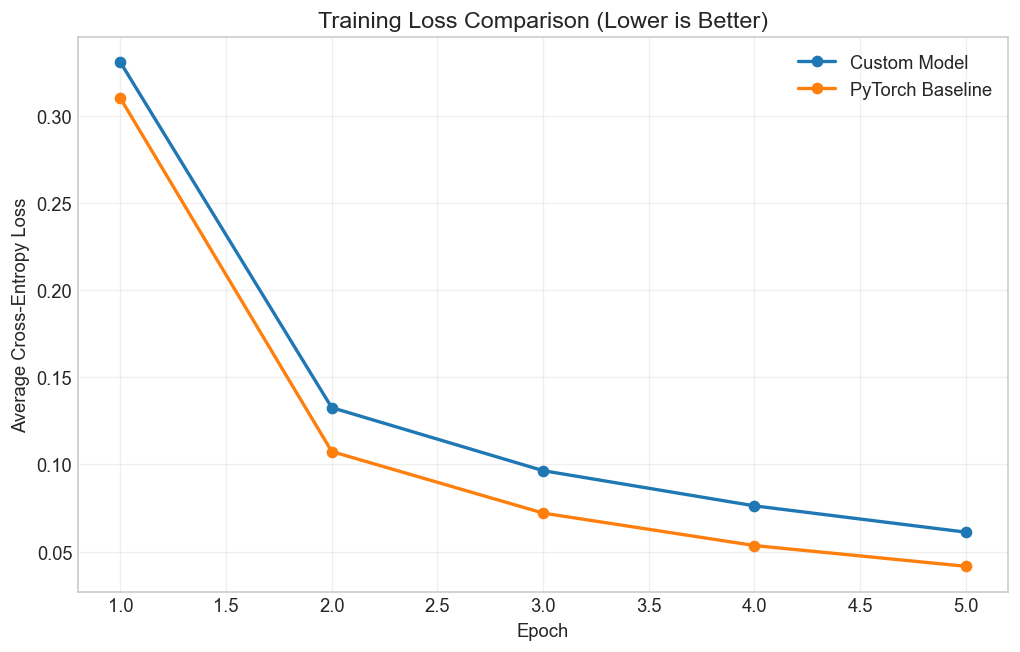

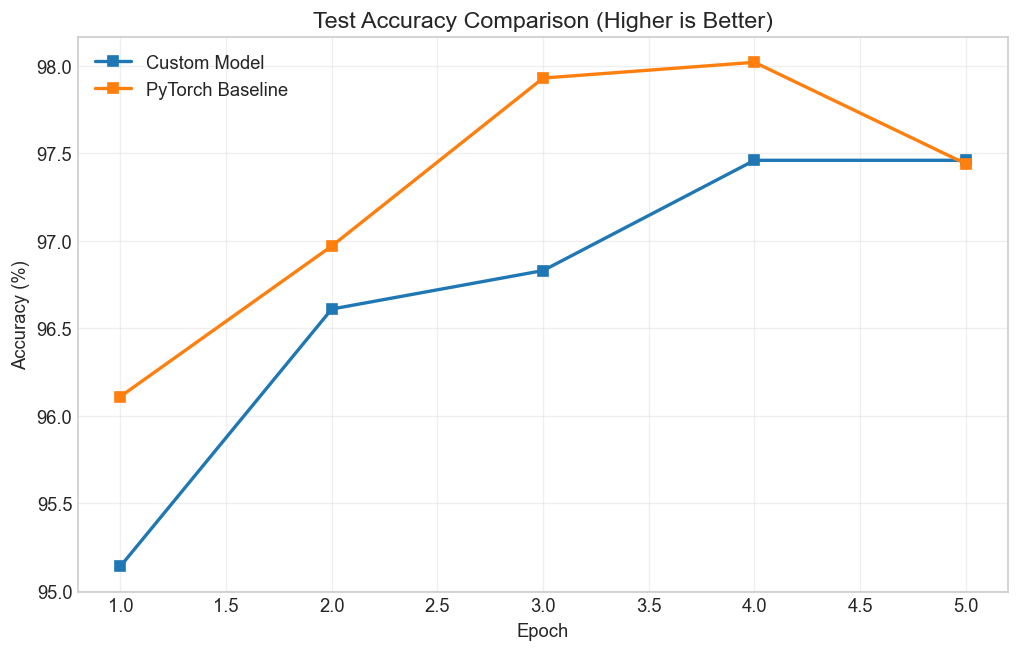

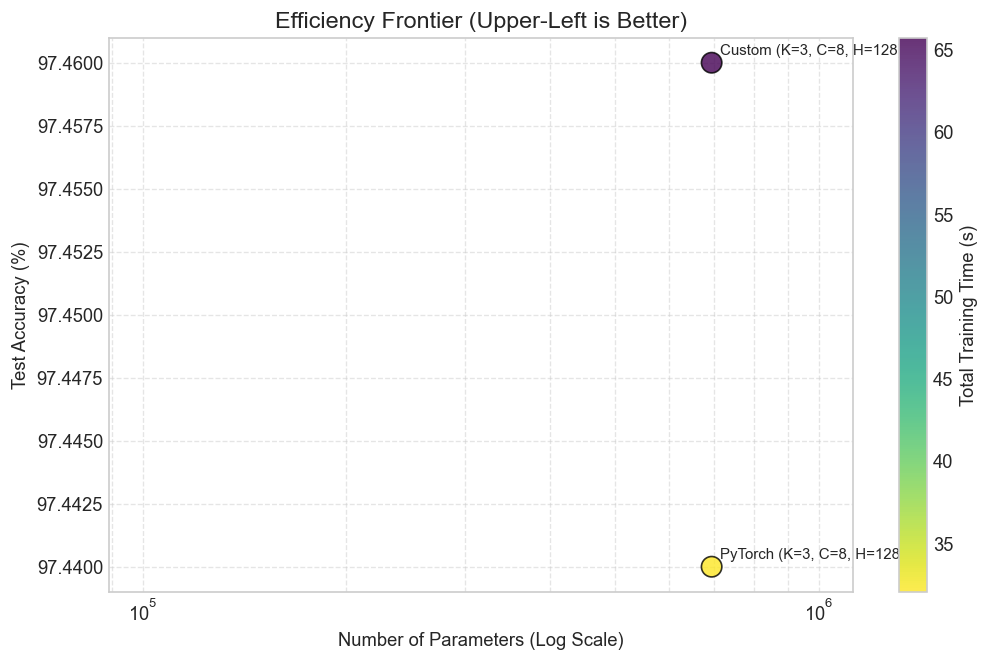

In [9]:
print("\n>>> Generating Comparison Plots...")
custom_log_path = "/Users/liuzengxuan/VSCode/MLproject/CNN_Physics77/logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251208_204218.json"
torch_log_path = "/Users/liuzengxuan/VSCode/MLproject/CNN_Physics77/logs/benchmark_run_k3_c8_h128_Adam_lr0.001_20251208_204326.json"
# 3. Visualize Comparison
visuals.plot_loss_comparison(custom=custom_log_path, torch=torch_log_path)
visuals.plot_accuracy_comparison(custom=custom_log_path, torch=torch_log_path)
visuals.plot_efficiency_frontier([custom_log_path, torch_log_path])

## 2. Gradient Norms Comparison


>>> Deep Diagnostics: Gradient Norm (Stability Check)


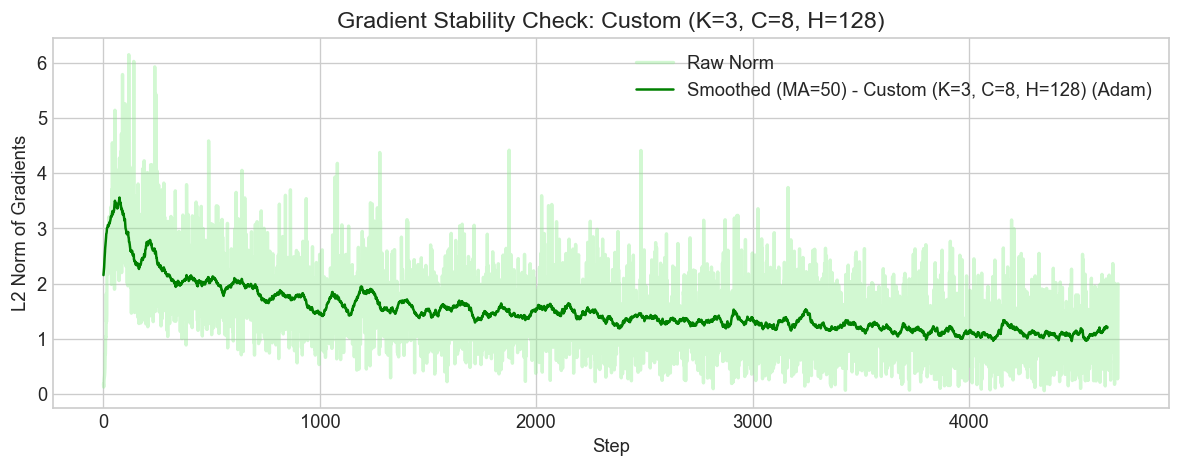

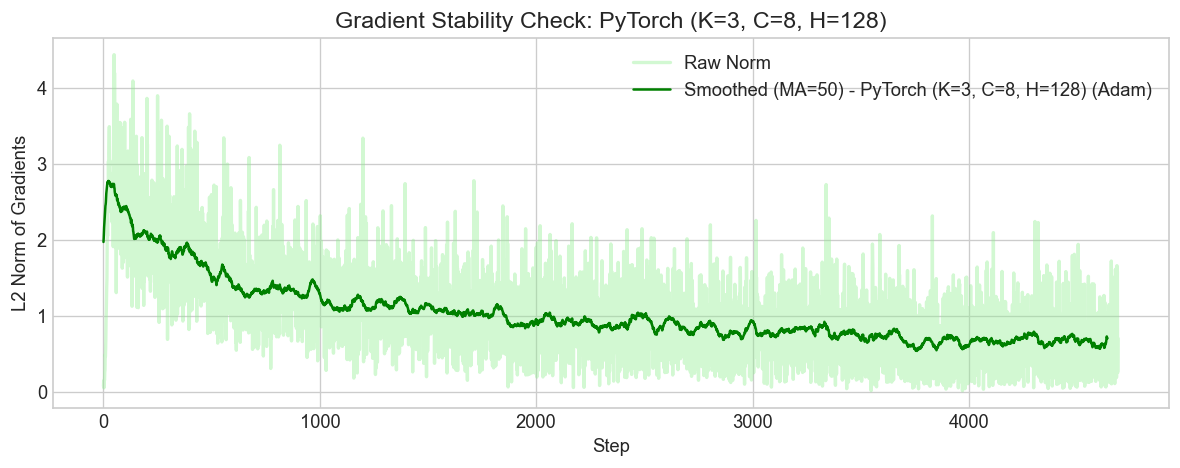

In [10]:
print("\n>>> Deep Diagnostics: Gradient Norm (Stability Check)")
visuals.plot_gradient_norm(custom_log_path)
visuals.plot_gradient_norm(torch_log_path)

## 3. Detailed Training Dynamics Analysis


>>> 2. Detailed Training Dynamics (Step-level Loss)


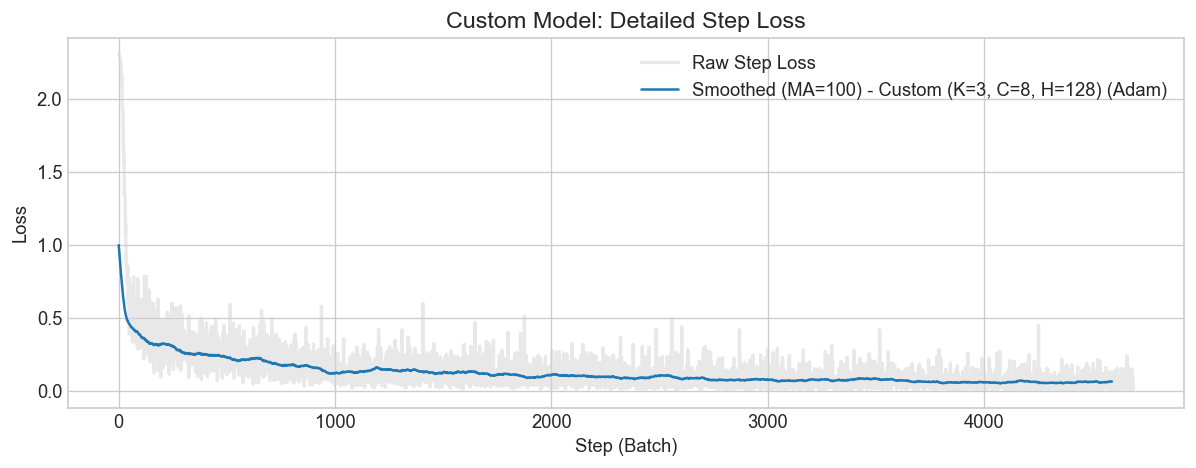

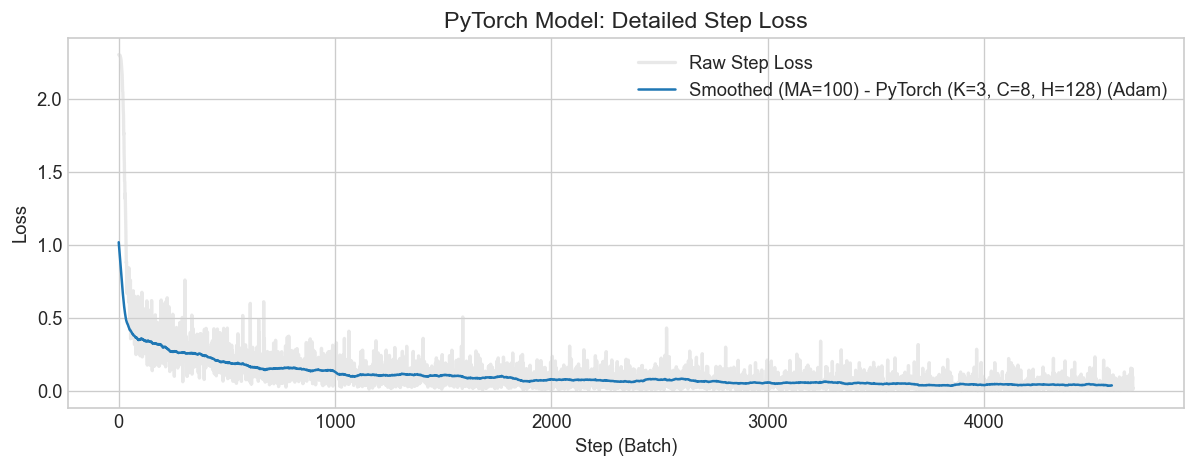

In [11]:
print("\n>>> 2. Detailed Training Dynamics (Step-level Loss)")
visuals.plot_detailed_loss(custom_log_path, window=100, title="Custom Model: Detailed Step Loss")
visuals.plot_detailed_loss(torch_log_path, window=100, title="PyTorch Model: Detailed Step Loss")

## 4. Conclusion Matrix Visualization


>>> 3. Error Analysis: Confusion Matrix


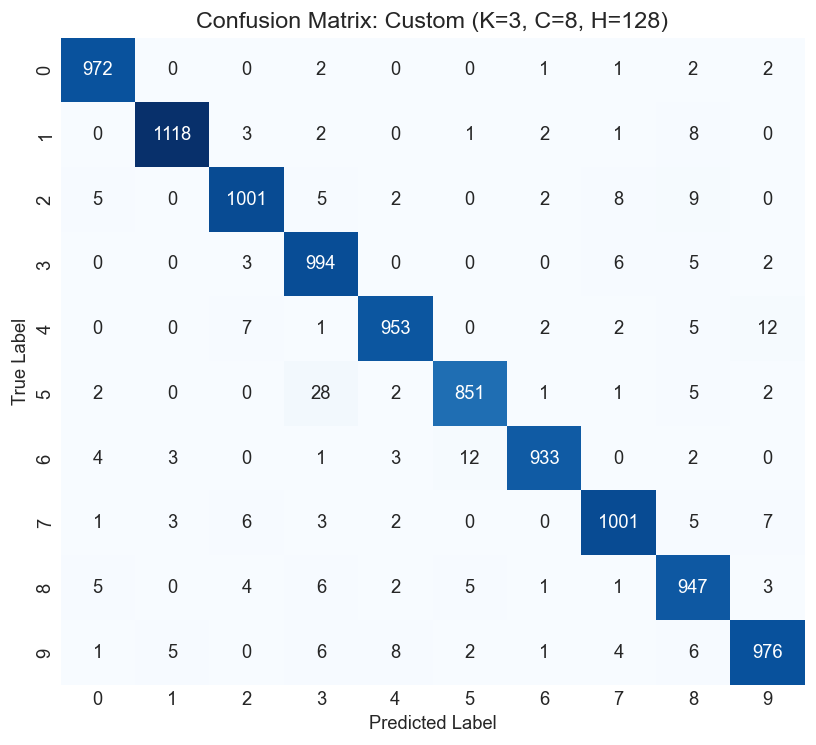

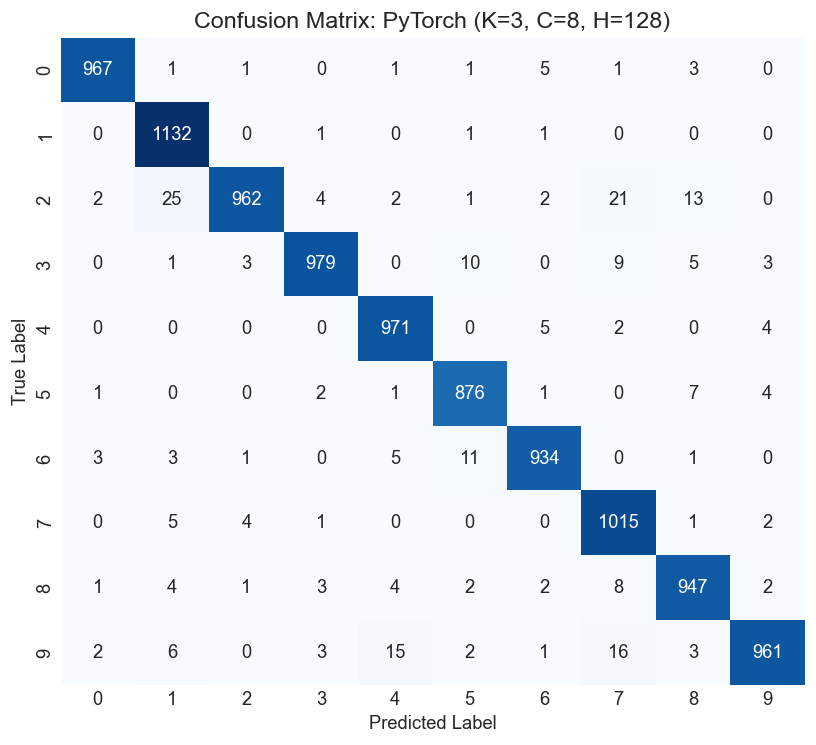

In [12]:
print("\n>>> 3. Error Analysis: Confusion Matrix")
visuals.plot_confusion_matrix(custom_log_path)
visuals.plot_confusion_matrix(torch_log_path)

## 5. Time & Memory Efficiency Comparison

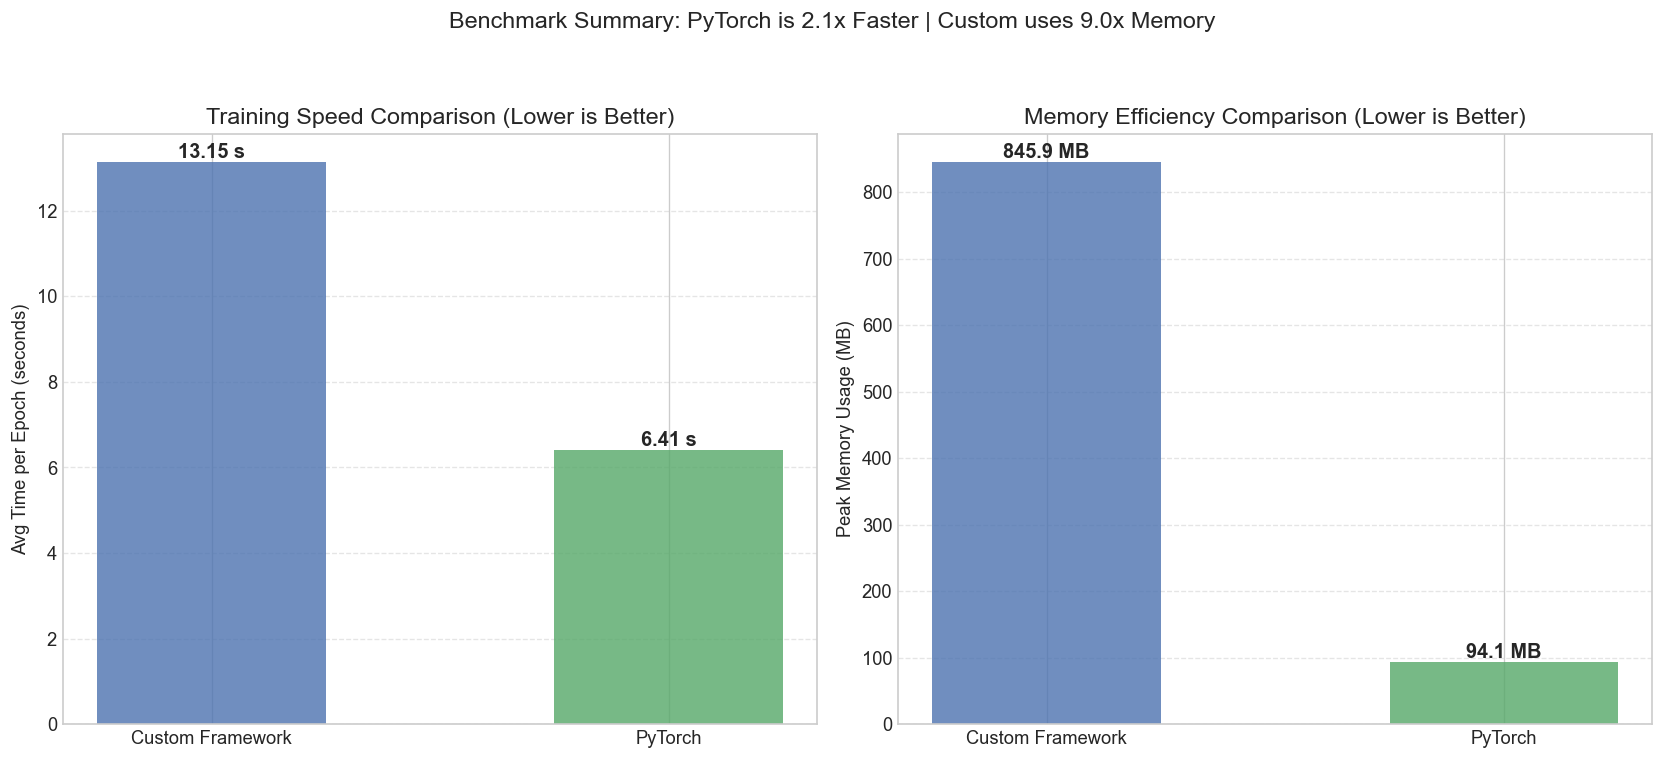

In [13]:
visuals.plot_system_benchmark(custom_log_path, torch_log_path)

## Comparison between SDG and Adam Optimizers

In [14]:
print("🚀 Starting 2x2 Benchmark: [Custom, Torch] x [SGD, Adam]...\n")

# Settings
EPOCHS = 5
BATCH = 64
LR = 0.01 

# --- Run 1: Custom + SGD ---
print(">>> [1/4] Custom Framework (SGD)...")
path_c_sgd = custom_model.train(
    optimizer_type="SGD", log_name="bench_sgd", 
    num_epochs=EPOCHS, batch_size=BATCH, lr=LR
)

# --- Run 2: Custom + Adam ---
print(">>> [2/4] Custom Framework (Adam)...")
path_c_adam = custom_model.train(
    optimizer_type="Adam", log_name="bench_adam", 
    num_epochs=EPOCHS, batch_size=BATCH, lr=LR
)

# --- Run 3: Torch + SGD ---
print(">>> [3/4] PyTorch Framework (SGD)...")
path_t_sgd = torch_model.train_torch(
    optimizer_type="SGD", log_name="bench_sgd", 
    num_epochs=EPOCHS, batch_size=BATCH, lr=LR
)

# --- Run 4: Torch + Adam ---
print(">>> [4/4] PyTorch Framework (Adam)...")
path_t_adam = torch_model.train_torch(
    optimizer_type="Adam", log_name="bench_adam", 
    num_epochs=EPOCHS, batch_size=BATCH, lr=LR
)

# Collect all log paths
all_logs = [path_c_sgd, path_c_adam, path_t_sgd, path_t_adam]

🚀 Starting 2x2 Benchmark: [Custom, Torch] x [SGD, Adam]...

>>> [1/4] Custom Framework (SGD)...
[INFO] Training Start | Optimizer: SGD | Epochs: 5
[INFO] Training log saved to: ./logs/bench_sgd_k3_c8_h128_SGD_lr0.01_20251208_212240.json
>>> [2/4] Custom Framework (Adam)...
[INFO] Training Start | Optimizer: Adam | Epochs: 5
[INFO] Training log saved to: ./logs/bench_adam_k3_c8_h128_Adam_lr0.01_20251208_212329.json
>>> [3/4] PyTorch Framework (SGD)...
[INFO-TORCH] Training Start | Opt: SGD | Device: cpu
Training log saved to: ./logs/bench_sgd_k3_c8_h128_SGD_lr0.01_20251208_212442.json
>>> [4/4] PyTorch Framework (Adam)...
[INFO-TORCH] Training Start | Opt: Adam | Device: cpu
Training log saved to: ./logs/bench_adam_k3_c8_h128_Adam_lr0.01_20251208_212513.json



📊 Generating 4-Set Comparative Visualization...


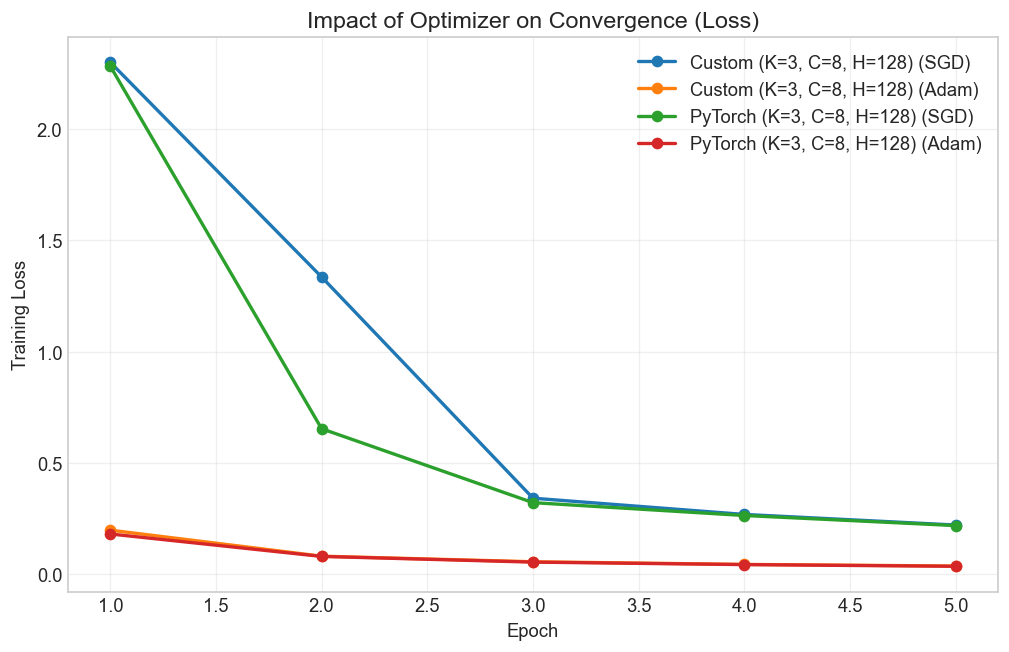

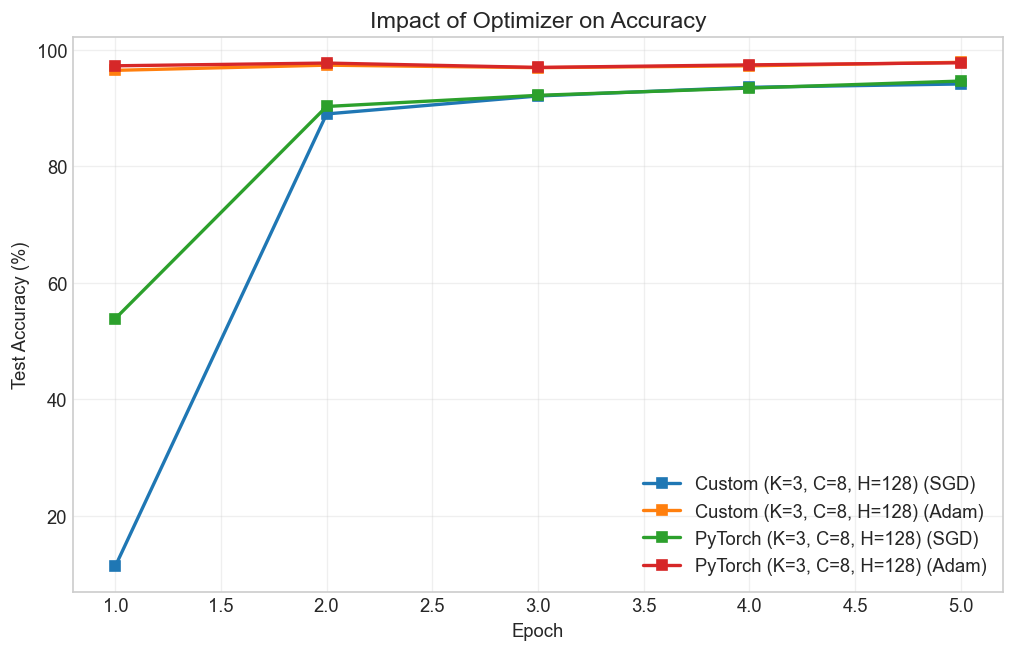

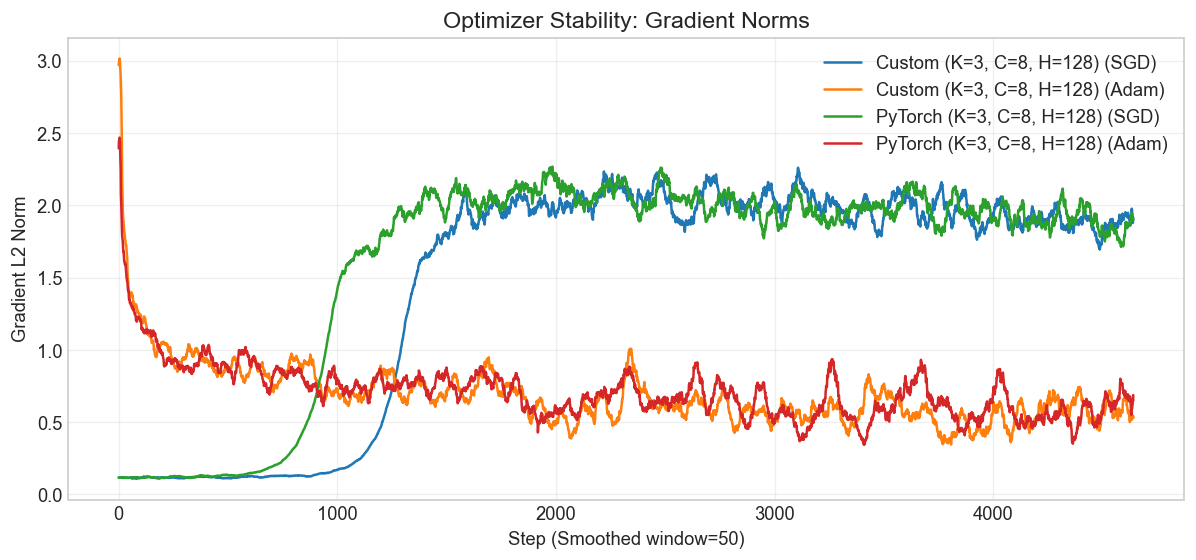

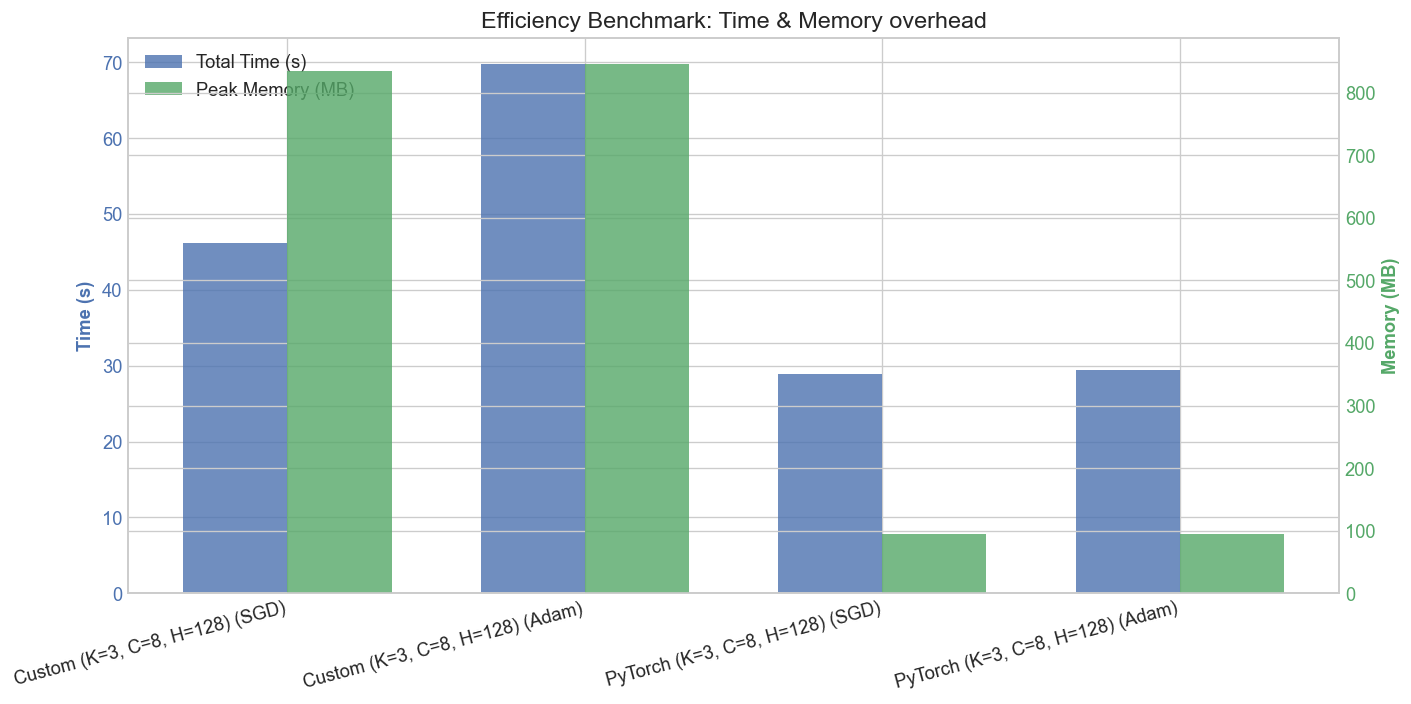

In [15]:
print("\n📊 Generating 4-Set Comparative Visualization...")

# 1. Loss Curve Comparison (Convergence)
# Expectation: SDG may show more oscillations, Adam smoother convergence
visuals.plot_multi_loss(all_logs, title="Impact of Optimizer on Convergence (Loss)")

# 2. Accuracy Curve Comparison (Generalization)
# Expectation: Adam usually shows faster initial accuracy improvement
visuals.plot_multi_accuracy(all_logs, title="Impact of Optimizer on Accuracy")

# 3. Training Stability Comparison (Gradient Norms)
# Expectation: SGD's gradient norm may fluctuate more than Adam's, or behave differently at various stages
visuals.plot_multi_grad_norm(all_logs, window=50, title="Optimizer Stability: Gradient Norms")

# 4. Computational Cost Comparison (Efficiency)
# Expectation: Adam is slightly slower and uses more memory than SGD (due to maintaining m and v momentum matrices)
# Expectation: PyTorch is generally faster than Custom
visuals.plot_performance_bar(all_logs, title="Efficiency Benchmark: Time & Memory overhead")
